<a href="https://colab.research.google.com/github/Ravikant001/Data-Science-Projects/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [30]:
#df=pd.read_csv("/content/sample_data/monthly_milk_production.csv", index_col="Date",parse_dates=True)
df=pd.read_csv("/content/dataset_tk.csv",parse_dates=True)

In [31]:
df.head()

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3


In [33]:
df["Month"] = pd.DatetimeIndex(df["Unnamed: 0"]).month

In [35]:
df["Year"] = pd.DatetimeIndex(df["Unnamed: 0"]).year

In [36]:
df["Dayofmonth"] = pd.DatetimeIndex(df["Unnamed: 0"]).day

In [37]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [38]:
df.head()

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,Month,Year,Dayofmonth
0,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,...,2.1,21.7,2.7,6.1,1.9,2.2,3.4,2,2019,1
1,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,...,2.2,23.4,2.4,6.5,1.8,2.2,3.6,3,2019,1
2,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,74.8,...,2.2,21.7,2.4,6.3,1.7,2.2,3.5,4,2019,1
3,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,69.0,...,2.2,22.5,2.7,5.7,1.8,2.3,3.5,5,2019,1
4,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,68.1,...,2.2,21.7,2.7,6.2,1.9,2.3,3.3,6,2019,1


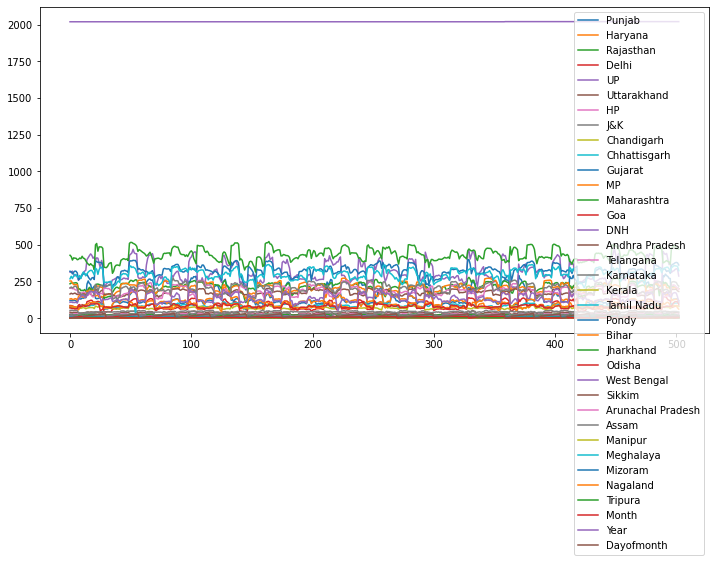

In [39]:
df.plot(figsize=(12,6))
plt.show()

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:
results=seasonal_decompose(df['Haryana'])
results.plot()

AttributeError: ignored

In [26]:
len(df)

503

In [14]:
train=df.iloc[:156]
test=df.iloc[156:]

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [16]:
df.head(),df.tail()

(            Unnamed: 0  Punjab  Haryana  Rajasthan  Delhi     UP  Uttarakhand  \
 0  02/01/2019 00:00:00   119.9    130.3      234.1   85.8  313.9         40.7   
 1  03/01/2019 00:00:00   121.9    133.5      240.2   85.5  311.8         39.3   
 2  04/01/2019 00:00:00   118.8    128.2      239.8   83.5  320.7         38.1   
 3  05/01/2019 00:00:00   121.0    127.5      239.1   79.2  299.0         39.2   
 4  06/01/2019 00:00:00   121.4    132.6      240.4   76.6  286.8         39.2   
 
      HP   J&K  Chandigarh  ...  Odisha  West Bengal  Sikkim  \
 0  30.0  52.5         5.0  ...    70.2        108.2     2.0   
 1  30.1  54.1         4.9  ...    67.9        110.2     1.9   
 2  30.1  53.2         4.8  ...    66.3        106.8     1.7   
 3  30.2  51.5         4.3  ...    65.8        107.0     2.0   
 4  31.0  53.2         4.3  ...    62.9        106.4     2.0   
 
    Arunachal Pradesh  Assam  Manipur  Meghalaya  Mizoram  Nagaland  Tripura  
 0                2.1   21.7      2.7    

In [27]:
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

ValueError: ignored

In [ ]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input=3
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [ ]:
X,y=generator[0]
print(f'Given array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')

Given array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
[[0.24759615]]


In [ ]:
X.shape

(1, 3, 1)

In [ ]:
n_input=12
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(generator,epochs=50)

Epoch 1/50
144/144 [==============================] - 2s 6ms/step - loss: 0.0406
Epoch 2/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0205
Epoch 3/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0144
Epoch 4/50
144/144 [==============================] - 2s 11ms/step - loss: 0.0122
Epoch 5/50
144/144 [==============================] - 2s 11ms/step - loss: 0.0079
Epoch 6/50
144/144 [==============================] - 2s 11ms/step - loss: 0.0076
Epoch 7/50
144/144 [==============================] - 2s 10ms/step - loss: 0.0057
Epoch 8/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0057
Epoch 9/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0042
Epoch 10/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0049
Epoch 11/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0047
Epoch 12/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0049
Epoch 13/50
144/144 [

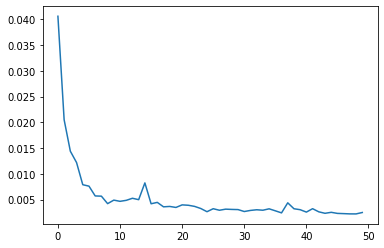

In [ ]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch=scaled_train[-12:]

In [ ]:
last_train_batch=last_train_batch.reshape((1,n_input,n_features))

In [ ]:
model.predict(last_train_batch)

array([[0.6529194]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.67548077])

In [ ]:
test_predictions=[]

first_eval_batch=scaled_train[-n_input:]
current_batch=first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
  current_pred=model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([0.6529194], dtype=float32),
 array([0.66834766], dtype=float32),
 array([0.8430937], dtype=float32),
 array([0.9140069], dtype=float32),
 array([1.0307125], dtype=float32),
 array([1.0037702], dtype=float32),
 array([0.9535641], dtype=float32),
 array([0.8467739], dtype=float32),
 array([0.7271058], dtype=float32),
 array([0.6690838], dtype=float32),
 array([0.62259966], dtype=float32),
 array([0.6512416], dtype=float32)]

In [ ]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [ ]:
true_predictions=scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions']=true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


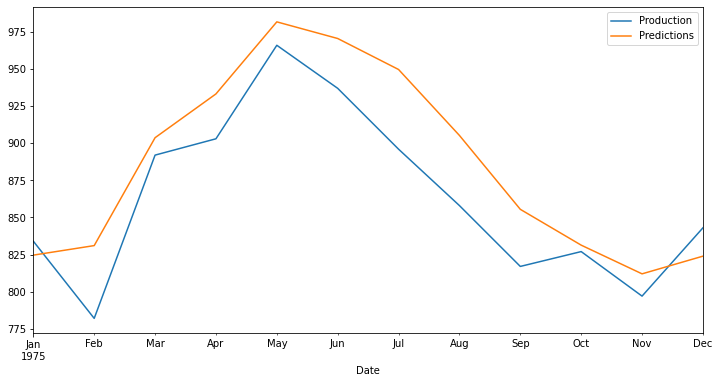

In [ ]:
test.plot(figsize=(12,6))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

31.784168627468574
